In [1]:
import tensorflow as tf
import keras 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras import regularizers
import pandas as pd
import numpy as np
import os
import datetime
from tensorflow.keras.optimizers import SGD
from keras.callbacks import EarlyStopping, TensorBoard
import seaborn as sns

In [2]:
filepath =  r"C:\Users\User\Downloads\Heart Disease Prediction Project\heart.csv"

heart_disease = pd.read_csv(filepath)
heart_disease.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


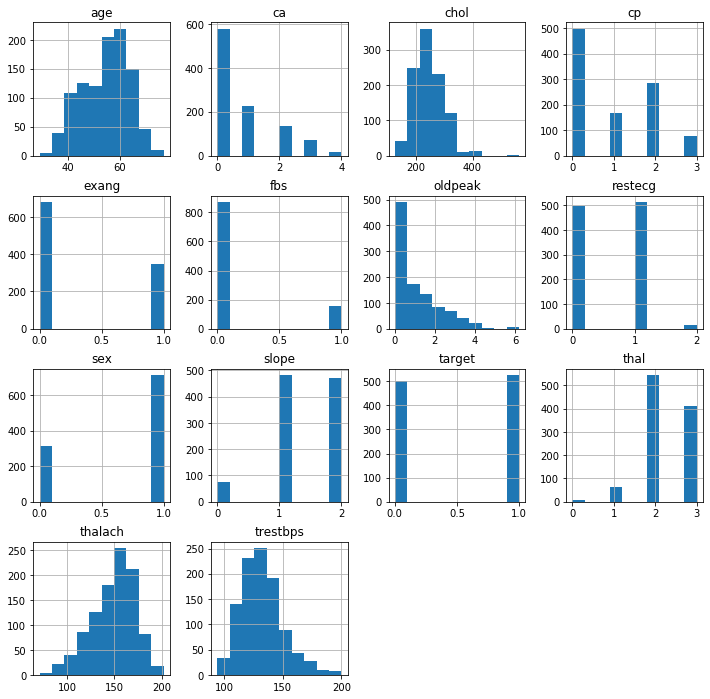

In [3]:
# plot histograms for each variable
heart_disease.hist(figsize = (12, 12))
plt.show()

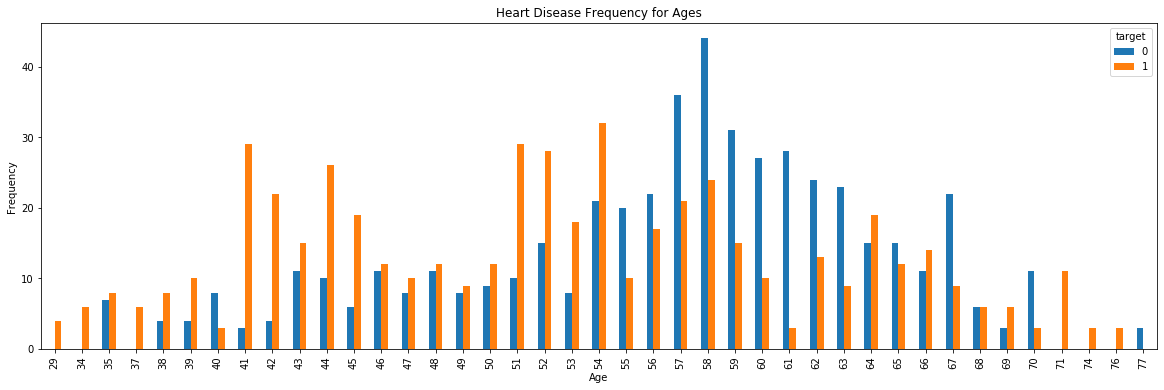

In [4]:
pd.crosstab(heart_disease.age,heart_disease.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

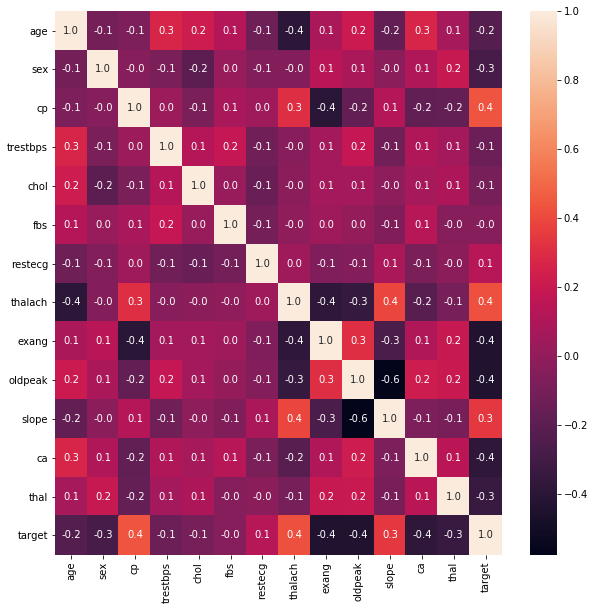

In [5]:
plt.figure(figsize=(10,10))
sns.heatmap(heart_disease.corr(),annot=True,fmt='.1f')
plt.show()

In [6]:
heart_disease = heart_disease.drop(['age','sex'], axis = 1)
heart_disease.head(10)

,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,125,212,0,1,168,0,1.0,2,2,3,0
1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,0,145,174,0,1,125,1,2.6,0,0,3,0
3,0,148,203,0,1,161,0,0.0,2,1,3,0
4,0,138,294,1,1,106,0,1.9,1,3,2,0
5,0,100,248,0,0,122,0,1.0,1,0,2,1
6,0,114,318,0,2,140,0,4.4,0,3,1,0
7,0,160,289,0,0,145,1,0.8,1,1,3,0
8,0,120,249,0,0,144,0,0.8,2,0,3,0
9,0,122,286,0,0,116,1,3.2,1,2,2,0


In [7]:
heart_disease_features = heart_disease.drop('target',axis=1)
heart_disease_label = heart_disease['target']

In [8]:
print(f"The shape of features: {heart_disease_features.shape}")
print(f"The shape of label: {heart_disease_label.shape}")

The shape of features: (1025, 11)
The shape of label: (1025,)


In [9]:
numpy_features = heart_disease_features.to_numpy()
numpy_label = heart_disease_label.to_numpy()

In [10]:
numpy_label = numpy_label.reshape(1025,1)

In [11]:
print(f"The shape of features: {numpy_features.shape}")
print(f"The shape of label: {numpy_label.shape}")

The shape of features: (1025, 11)
The shape of label: (1025, 1)


In [12]:
features_train, features_test, label_train, label_test = train_test_split(numpy_features,
                                                                         numpy_label,
                                                                         test_size = 0.2,
                                                                         random_state = 12345)

In [13]:
standardizer = StandardScaler()

In [14]:
features_train = standardizer.fit_transform(features_train)
features_test = standardizer.transform(features_test)

In [15]:
print(features_train)

[[ 1.03531901 -0.10542105  1.329134   ...  0.97860232  0.25630599
  -0.49803643]
 [-0.92081368 -1.14138294 -0.66028008 ...  0.97860232  0.25630599
  -0.49803643]
 [ 1.03531901  1.04564771 -0.06152439 ... -0.65572335 -0.72580107
  -0.49803643]
 ...
 [ 1.03531901 -1.25648981  0.36339901 ...  0.97860232  0.25630599
  -0.49803643]
 [ 0.05725266 -0.68095543  0.67243421 ... -0.65572335  0.25630599
   1.10349247]
 [-0.92081368  0.47011333  1.0007841  ... -0.65572335  2.22052012
   1.10349247]]


In [16]:
print(features_test)

[[ 1.03531901  0.23989957 -0.96931528 ... -0.65572335 -0.72580107
  -0.49803643]
 [ 0.05725266 -1.25648981 -0.33193018 ... -2.29004901 -0.72580107
   1.10349247]
 [ 2.01338536  0.75788052 -0.25467138 ... -2.29004901 -0.72580107
  -2.09956532]
 ...
 [ 1.03531901  1.04564771 -1.51012687 ...  0.97860232 -0.72580107
  -0.49803643]
 [ 2.01338536 -0.68095543 -0.29330078 ... -0.65572335 -0.72580107
   1.10349247]
 [ 0.05725266 -1.544257   -0.81479768 ...  0.97860232 -0.72580107
  -0.49803643]]


In [17]:
adam = keras.optimizers.Adam(learning_rate=0.001)
bce = keras.losses.BinaryCrossentropy(from_logits=False)
accuracy = keras.metrics.BinaryAccuracy()

In [18]:
fnn_model = keras.Sequential([
    keras.layers.InputLayer(input_shape = features_train.shape[1]),
    keras.layers.Dense(128, activation='relu',kernel_regularizer=regularizers.L2(0.001)),
    #keras.layers.Dropout(0.25),
    keras.layers.Dense(64, activation='relu',kernel_regularizer=regularizers.L2(0.001)),
    #keras.layers.Dropout(0.25),
    keras.layers.Dense(32, activation='relu',kernel_regularizer=regularizers.L2(0.001)),
    #keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

In [19]:
fnn_model.compile(optimizer=adam,loss=bce,metrics=[accuracy])
#fnn_model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9, nesterov=True),loss=bce,metrics=[accuracy])

In [20]:
base_log_path = r"C:\Users\User\Downloads\heart_log"
log_path = os.path.join(base_log_path, datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
es = EarlyStopping(monitor='val_loss',patience=5, verbose=2)
tb = TensorBoard(log_dir=log_path)

In [21]:
history = fnn_model.fit(features_train, label_train, 
                        validation_data=(features_test, label_test), 
                        batch_size=32, epochs=20, callbacks=[es,tb])

Epoch 1/20
26/26 [==============================] - 5s 42ms/step - loss: 0.7019 - binary_accuracy: 0.7256 - val_loss: 0.5803 - val_binary_accuracy: 0.7707
Epoch 2/20
26/26 [==============================] - 1s 20ms/step - loss: 0.5352 - binary_accuracy: 0.8244 - val_loss: 0.5168 - val_binary_accuracy: 0.8390
Epoch 3/20
26/26 [==============================] - 1s 22ms/step - loss: 0.4756 - binary_accuracy: 0.8634 - val_loss: 0.4787 - val_binary_accuracy: 0.8634
Epoch 4/20
26/26 [==============================] - 1s 23ms/step - loss: 0.4416 - binary_accuracy: 0.8768 - val_loss: 0.4792 - val_binary_accuracy: 0.8439
Epoch 5/20
26/26 [==============================] - 1s 23ms/step - loss: 0.4118 - binary_accuracy: 0.8829 - val_loss: 0.4292 - val_binary_accuracy: 0.9024
Epoch 6/20
26/26 [==============================] - 1s 21ms/step - loss: 0.3786 - binary_accuracy: 0.8988 - val_loss: 0.4111 - val_binary_accuracy: 0.8927
Epoch 7/20
26/26 [==============================] - 1s 23ms/step - los

In [22]:
training_loss = history.history['loss']
training_acc = history.history['binary_accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_binary_accuracy']

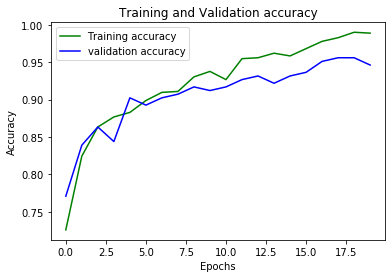

In [23]:
epochs = history.epoch
fig1, axs1 = plt.subplots()
axs1.plot(epochs, training_acc, 'g', label='Training accuracy')
axs1.plot(epochs, val_acc, 'b', label='validation accuracy')
axs1.set_title('Training and Validation accuracy')
axs1.set_xlabel('Epochs')
axs1.set_ylabel('Accuracy')
axs1.legend()

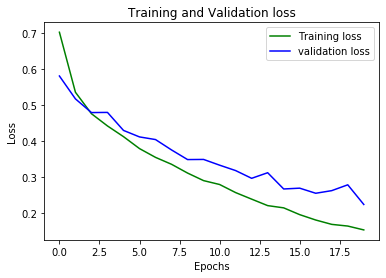

In [24]:
fig2, axs2 = plt.subplots()
axs2.plot(epochs, training_loss, 'g', label='Training loss')
axs2.plot(epochs, val_loss, 'b', label='validation loss')
axs2.set_title('Training and Validation loss')
axs2.set_xlabel('Epochs')
axs2.set_ylabel('Loss')
axs2.legend()